# Problem Statment of the project:

Goal - It was a job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.
Metric Submissions are evaluated on Mean-Squared-Error (MSE). Submission File Format- The file should contain a header and have the following format:

Id,SalePrice 1461,169000.1 1462,187724.1233 1463,175221


# Solution of the poject-

# Read dataset

In [1]:
#As we have to predict the sales price of house which is a continous variable it is a regression problem.

In [2]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

trd = pd.read_csv("D:/datascience/mega project 1/training_set.csv")
trd.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
tsd = pd.read_csv("D:/datascience/mega project 1/testing_set.csv")
tsd.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


# Profile

In [4]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Missing Data treatment

In [6]:
#While going through the profile we get to know that values are not consistent there are some missing values in the dataset 
#so to deal with that problem we have to do missing data treatment.
#But while reading the data it was observed that there was some columns in which N/A does not mean missing values but it means
#that feature is not avaible so we have to change that N/A values to none because python treats N/A values as the missing values.

In [7]:
trd.Alley = trd.Alley.fillna("None")
trd.BsmtQual = trd.BsmtQual.fillna("None")
trd.BsmtCond = trd.BsmtCond.fillna("None")
trd.BsmtExposure = trd.BsmtExposure.fillna("None")
trd.BsmtFinType1 = trd.BsmtFinType1.fillna("None")
trd.BsmtFinType2 = trd.BsmtFinType2.fillna("None")
trd.FireplaceQu = trd.FireplaceQu.fillna("None")
trd.GarageType = trd.GarageType.fillna("None")
trd.GarageFinish = trd.GarageFinish.fillna("None")
trd.GarageQual = trd.GarageQual.fillna("None")
trd.GarageCond = trd.GarageCond.fillna("None")
trd.PoolQC = trd.PoolQC.fillna("None")
trd.Fence = trd.Fence.fillna("None")
trd.MiscFeature = trd.MiscFeature.fillna("None")

In [8]:
tsd.Alley = tsd.Alley.fillna("None")
tsd.BsmtQual = tsd.BsmtQual.fillna("None")
tsd.BsmtCond = tsd.BsmtCond.fillna("None")
tsd.BsmtExposure = tsd.BsmtExposure.fillna("None")
tsd.BsmtFinType1 = tsd.BsmtFinType1.fillna("None")
tsd.BsmtFinType2 = tsd.BsmtFinType2.fillna("None")
tsd.FireplaceQu = tsd.FireplaceQu.fillna("None")
tsd.GarageType = tsd.GarageType.fillna("None")
tsd.GarageFinish = tsd.GarageFinish.fillna("None")
tsd.GarageQual = tsd.GarageQual.fillna("None")
tsd.GarageCond = tsd.GarageCond.fillna("None")
tsd.PoolQC = tsd.PoolQC.fillna("None")
tsd.Fence = tsd.Fence.fillna("None")
tsd.MiscFeature = tsd.MiscFeature.fillna("None")

In [9]:
trd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
tsd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [11]:
con = []
cat = []
for i in trd.columns:
    if(trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
con.remove("SalePrice")

In [14]:
Q = list(trd[con].nunique().sort_values().index[0:15])

In [15]:
for i in Q:
    cat.append(i)
    con.remove(i)

In [16]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'BsmtHalfBath',
 'HalfBath',
 'Fireplaces',
 'KitchenAbvGr',
 'FullBath',
 'BsmtFullBath',
 'GarageCars',
 'YrSold',
 'BedroomAbvGr',
 'PoolArea',
 'OverallCond',
 'OverallQual',
 'TotRmsAbvGrd',
 'MoSold',
 'MSSubClass']

In [17]:
for i in cat:
    x = trd[i].mode()[0]
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)
    
for i in con:
    x = trd[i].mean()
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)

In [18]:
trd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [19]:
tsd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Outliers

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)

In [21]:
out = []
for i in con:
    out = out + list(X1[(X1[i]>3)|(X1[i]<-3)].index)

In [22]:
from numpy import unique
outliers = list(unique(out))

In [23]:
trd = trd.drop(index=outliers,axis=0)
trd.shape

(1167, 81)

In [24]:
trd.index = range(0,1167,1)

# EDA

In [25]:
Y = trd[["SalePrice"]]

Q = pd.DataFrame(trd.corr()['SalePrice'].sort_values())
imp_cons = list(Q[(Q.SalePrice>0.1)|(Q.SalePrice<-0.1)][Q.SalePrice!=1].index)

# Data Preparation

In [26]:
trd[con].head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,1710,2003.0,548,0,61,0,0,0,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,1262,1976.0,460,298,0,0,0,0,0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,1786,2001.0,608,0,42,0,0,0,0
3,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,2198,2000.0,836,192,84,0,0,0,0
4,7,75.0,10084,2004,2005,186.0,1369,0,317,1686,...,0,1694,2004.0,636,255,57,0,0,0,0


In [27]:
trd[cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,BsmtFullBath,GarageCars,YrSold,BedroomAbvGr,PoolArea,OverallCond,OverallQual,TotRmsAbvGrd,MoSold,MSSubClass
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1,2,2008,3,0,5,7,8,2,60
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,2,2007,3,0,8,6,6,5,20
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1,2,2008,3,0,5,7,6,9,60
3,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,1,3,2008,4,0,5,8,9,12,60
4,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,1,2,2007,3,0,5,8,7,8,20


In [28]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(trd[con]),columns=con)
X2 = pd.get_dummies(trd[cat])
Xnew = X1.join(X2)

X11 = pd.DataFrame(ss.transform(tsd[con]),columns=con)
X21 = pd.get_dummies(tsd[cat])
Xnew_test = X11.join(X21)

In [29]:
len(X2.columns),len(X21.columns)

(265, 263)

In [30]:
#As the number of columns are mismatching we have to add the columns of training test which are not present in testing set into testing set.

In [31]:
Xnew_test[Xnew.columns]

KeyError: "['GarageQual_Ex', 'Heating_Floor', 'Condition2_RRAn', 'PoolQC_Fa', 'Exterior1st_ImStucc', 'RoofMatl_Roll', 'Exterior2nd_Other', 'Electrical_Mix', 'Condition2_RRNn'] not in index"

In [32]:
#The columns in key errors are the columns which are not present in testing set.

In [33]:
Q = ['Heating_Floor', 'RoofMatl_Roll', 'GarageQual_Ex', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'PoolQC_Fa', 'Condition2_RRAn', 'Condition2_RRNn']

In [34]:
#So we will add this columns into testing set.

In [35]:
for i in Q:
    Xnew_test[i]=0
#Xnew_test[Xnew.columns]

In [36]:
Xnew_test[Xnew.columns]
#so again we executed this command to check whether columns are matching or not.

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.733238,0.451936,0.110763,-0.340077,-1.156380,-0.574410,0.053428,0.604293,-0.672923,-0.400017,...,0,0,0,1,0,0,0,0,1,0
1,1.735610,0.497357,0.375850,-0.439440,-1.301740,0.023903,1.051363,-0.288653,-0.365032,0.619239,...,0,0,0,1,0,0,0,0,1,0
2,1.737983,0.179413,0.332053,0.852269,0.636400,-0.574410,0.761852,-0.288653,-0.974021,-0.295127,...,0,0,0,1,0,0,0,0,1,0
3,1.740356,0.361095,-0.054002,0.885390,0.636400,-0.463612,0.347326,-0.288653,-0.550672,-0.299687,...,0,0,0,1,0,0,0,0,1,0
4,1.742728,-1.228623,-0.552407,0.686666,0.345679,-0.574410,-0.396190,-0.288653,1.018211,0.507509,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.183104,-2.227875,-0.859988,-0.041991,-0.720298,-0.574410,-0.973018,-0.288653,-0.048086,-1.166169,...,0,0,0,1,0,0,0,0,1,0
1455,5.185477,-2.227875,-0.864197,-0.041991,-0.720298,-0.574410,-0.420316,-0.288653,-0.618589,-1.166169,...,0,0,0,1,1,0,0,0,0,0
1456,5.187849,4.085578,0.950423,-0.373198,0.539493,-0.574410,1.711535,-0.288653,-1.284176,0.379817,...,0,0,0,1,1,0,0,0,0,0
1457,5.190222,-0.365633,-0.007600,0.686666,0.345679,-0.574410,-0.233889,-0.288653,0.017567,-0.331610,...,0,0,0,1,0,0,0,0,1,0


# Splitting

In [37]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Regression Models

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err

(214420188.53, 1.3496207203224979e+25)

# Backward Elemination OLS models

In [39]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()
#ols.summary()

In [40]:
rsq = round(ols.rsquared_adj,4)

In [41]:
col_to_drop = ols.pvalues.sort_values().index[-1]

In [42]:
RS = [] #Here RS = Rsquared 
for i in range(0,170,1):
    Xnew = Xnew.drop(labels=col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    from statsmodels.api import add_constant,OLS
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst).fit()
    rsq = round(ols.rsquared_adj,4)
    RS.append(rsq)
    col_to_drop = ols.pvalues.sort_values().index[-1]
    if(col_to_drop=="const"):
        col_to_drop = ols.pvalues.sort_values().index[-2]
    else:
        col_to_drop = ols.pvalues.sort_values().index[-1]

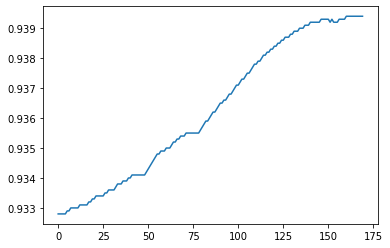

In [44]:
import matplotlib.pyplot as plt
plt.plot(RS) 
#We are plotting the RS to know that after which value the rsquared starts declining and accoding to it we can make changes in the range of i

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err

(226200818.29, 519174497.99)

In [46]:
# As the model is low baised high variance we need to regularize it.

In [47]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    return tr_err,ts_err

In [48]:
modeller(lm)

(226200818.29, 519174497.99)

# Regularize

In [49]:
from sklearn.linear_model import Ridge,Lasso
rr = Ridge(alpha=1)
modeller(rr)

(238468932.74, 487456609.11)

In [50]:
q = 0.0
alphas = []
for i in range(0,500):
    q = round(q + 0.1,2)
    alphas.append(q)

In [51]:
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    tr_err,ts_err = modeller(rr)
    tr.append(tr_err)
    ts.append(ts_err)

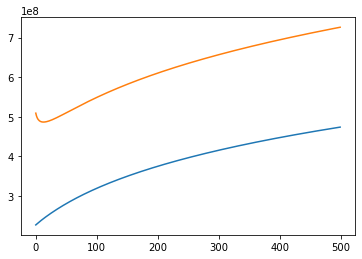

In [52]:
plt.plot(tr)
plt.plot(ts)

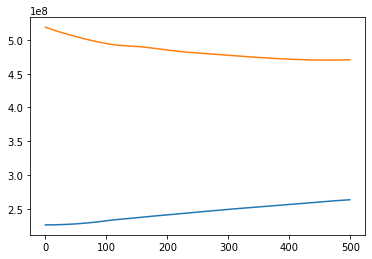

In [54]:
tr = []
ts = []
for i in alphas:
    ls = Lasso(alpha=i)
    tr_err,ts_err = modeller(ls)
    tr.append(tr_err)
    ts.append(ts_err)
plt.plot(tr)
plt.plot(ts)

In [55]:
#As the lines are comming closer we need to try more values of alpha 

In [56]:
alphas #So we tried 50 values of alpha and will now try more.

[0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.3,
 9.4,
 9.5,
 9.6,
 9.7,
 9.8,
 9.9,
 10.0,
 10.1,
 10.2,
 10.3,
 10.4,
 10.5,
 10.6,
 10.7,
 10.8,
 10.9,
 11.0,
 11.1,
 11.2,
 11.3,
 11.4,
 11.5,
 11.6,
 11.7,
 11.8,
 11.9,
 12.0,
 12.1,
 12.2,
 12.3,
 12.4,
 12.5,
 12.6,
 12.7,
 12.8,
 12.9,
 13.0,
 13.1,
 13.2,
 13.3,
 13.4,
 13.5,
 13.6,
 13.7,
 13.8,
 13.9,
 14.0,
 14.1,
 14.2,
 14.3,
 14.4,
 14.5,
 14.6,
 14.7,
 14.8,
 14.9,
 15.0,
 15.1,
 15.2,
 15.3,
 15.4,
 15.5,
 15.6,
 15.7,


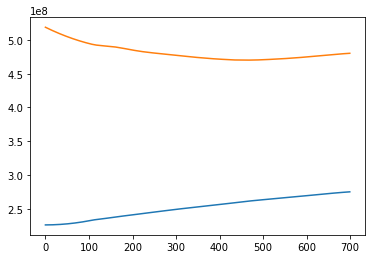

In [57]:
q = 0.0
alphas = []
for i in range(0,700):
    q = round(q + 0.1,2)
    alphas.append(q)

tr = []
ts = []
for i in alphas:
    ls = Lasso(alpha=i)
    tr_err,ts_err = modeller(ls)
    tr.append(tr_err)
    ts.append(ts_err)
plt.plot(tr)
plt.plot(ts)

In [58]:
#When we made the first model generalization error was-
521072192.29 - 226128723.18

294943469.11

In [59]:
alphas[500] # Near 500 we can se the least generalization error

50.1

In [60]:
ls = Lasso(alpha=50.1)
modeller(ls)

(263506509.46, 470725933.47)

In [61]:
464790723.03 - 261836353.1 # Here genaralization error has reduced we will se how much it as reduced.

202954369.92999998

In [62]:
294943469 - 202954369

91989100

In [63]:
from sklearn.model_selection import GridSearchCV
ls = Lasso()
tg = {"alpha":alphas}

cv = GridSearchCV(ls,tg,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 67.4}

# Final Model

In [65]:
ls = Lasso(alpha=67.4)
model = ls.fit(Xnew,Y)

# Data preparation for predictions

In [66]:
final_df_pred = Xnew_test[Xnew.columns]

In [67]:
pred = model.predict(final_df_pred)

In [68]:
Q = tsd[["Id"]]
Q['SalePrice']=pred

In [69]:
Q

,Id,SalePrice
0,1461,-110850.075859
1,1462,63051.802156
2,1463,111878.532532
3,1464,121758.891903
4,1465,72686.020605
...,...,...
1454,2915,-204792.587075
1455,2916,-191455.580794
1456,2917,84253.602653
1457,2918,-108533.764716


In [70]:
Q.to_csv("Desktop/final_predictions_of_SalesPrice.csv")